In [1]:
import neurokit2 as nk
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from golomb_code import encode, decode
import os
from butterworth import butter_bandpass_filter_zi
from scipy.interpolate import make_interp_spline

In [2]:
### data 1 compression - filtered data
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams.update({'font.size': 20})

In [3]:
'''
each column represent the one light source in the ppg sensor
sampling rate is 24 samples per second which is ideal as the ppg relies between 0.5 and 5hz
'''

data = pd.read_csv('0000.csv')
data.head()

,1649438306,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,98,74722.0,252665.0,264880.0
1,98,74761.0,252726.0,264924.0
2,98,74801.0,252745.0,264944.0
3,98,74787.0,252654.0,264851.0
4,98,74706.0,252366.0,264568.0


In [4]:
data['Unnamed: 1'].min(), data['Unnamed: 1'].max(), data['Unnamed: 1'].mean()

(70033.0, 80847.0, 75606.92574199806)

In [5]:
data['Unnamed: 2'].min(), data['Unnamed: 2'].max(), data['Unnamed: 2'].mean()

(238400.0, 279631.0, 257000.50285160038)

In [6]:
data['Unnamed: 3'].min(), data['Unnamed: 3'].max(), data['Unnamed: 3'].mean()

(252289.0, 303158.0, 274402.1816876819)

### plots of the three channels before filtering

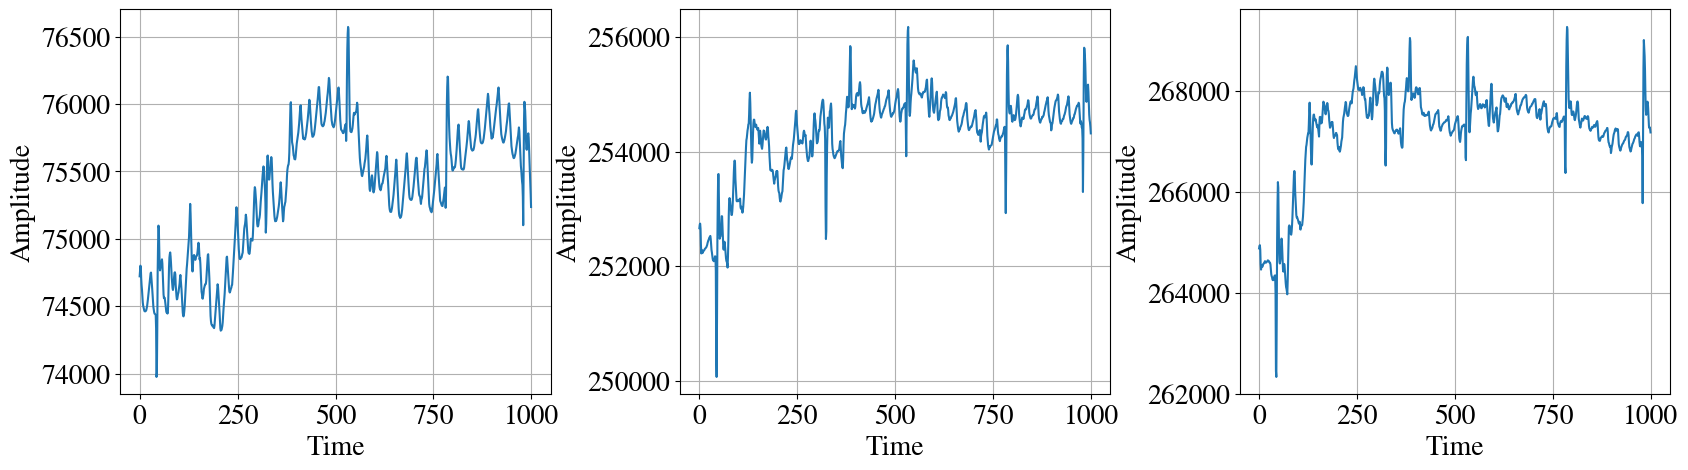

In [15]:

plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.plot(data['Unnamed: 1'][:1000])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()
plt.subplot(1,3,2)
plt.plot(data['Unnamed: 2'][:1000])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()
plt.subplot(1,3,3)
plt.plot(data['Unnamed: 3'][:1000])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()
plt.subplots_adjust(wspace=0.3)
plt.savefig('ppg_unfiltered.pdf',  bbox_inches = 'tight')

/home/ifire/.local/lib/python3.10/site-packages/neurokit2/ppg/ppg_clean.py:73: NeuroKitWarning: There are 1 missing data points in your signal. Filling missing values using `signal_fillmissing`.
  warn(


Text(0, 0.5, 'Amplitude')

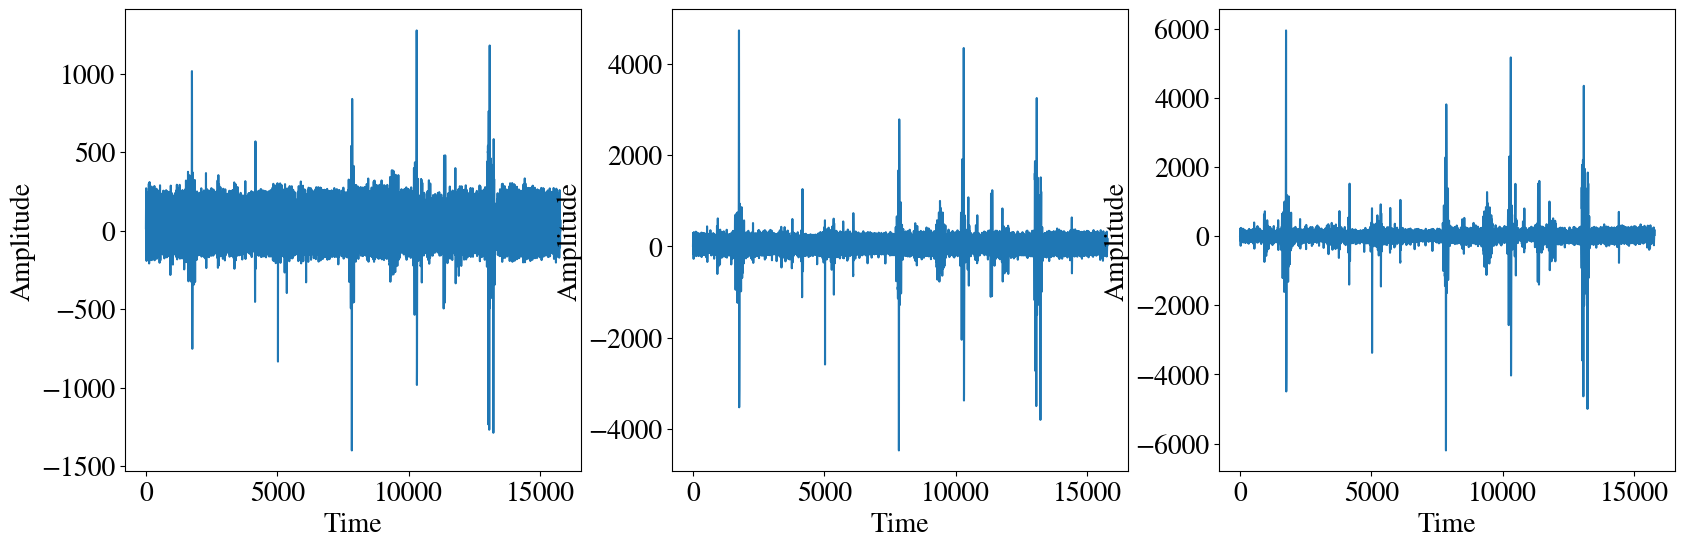

In [15]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.plot(nk.ppg_clean(data['Unnamed: 1'][10000:], 25, method='elgendi'))
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.subplot(1,3,2)
plt.plot(nk.ppg_clean(data['Unnamed: 2'][10000:], 25, method='elgendi'))
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.subplot(1,3,3)
plt.plot(nk.ppg_clean(data['Unnamed: 3'][10000:], 25, method='elgendi'))
plt.xlabel('Time')
plt.ylabel('Amplitude')

In [16]:
nk_cleaned = {
              'Channel 1' : nk.ppg_clean(data['Unnamed: 1']), 
              'Channel 2' : nk.ppg_clean(data['Unnamed: 2']),
              'Channel 3' : nk.ppg_clean(data['Unnamed: 3']),                          
            }

In [17]:
max(nk_cleaned['Channel 1'])

6055.941514544054

/home/ifire/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'Spectrum (ms2/Hz)')

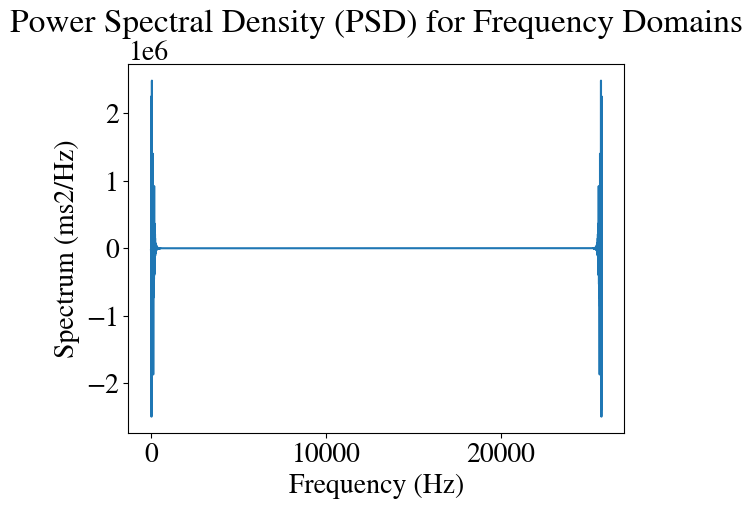

In [18]:
fft = np.fft.fft(nk.ppg_clean(data['Unnamed: 1']))
plt.plot(fft)
plt.title('Power Spectral Density (PSD) for Frequency Domains')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Spectrum (ms2/Hz)')

/home/ifire/.local/lib/python3.10/site-packages/neurokit2/ppg/ppg_clean.py:73: NeuroKitWarning: There are 1 missing data points in your signal. Filling missing values using `signal_fillmissing`.
  warn(
/home/ifire/.local/lib/python3.10/site-packages/neurokit2/ppg/ppg_clean.py:73: NeuroKitWarning: There are 1 missing data points in your signal. Filling missing values using `signal_fillmissing`.
  warn(


,Hz_0_10
0,1.864597


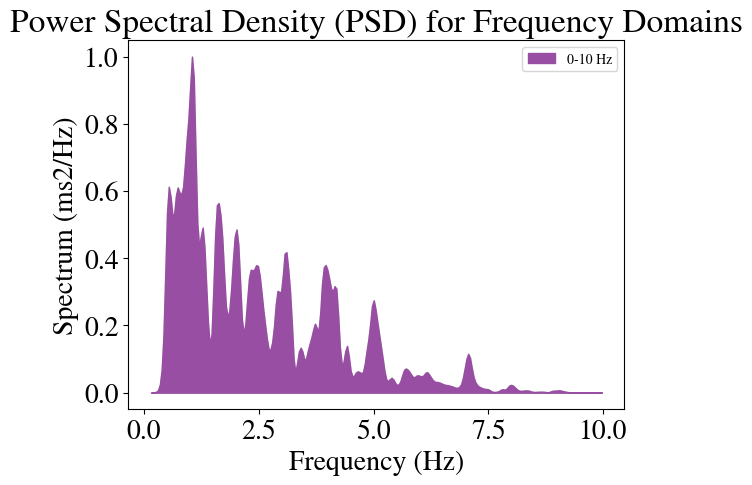

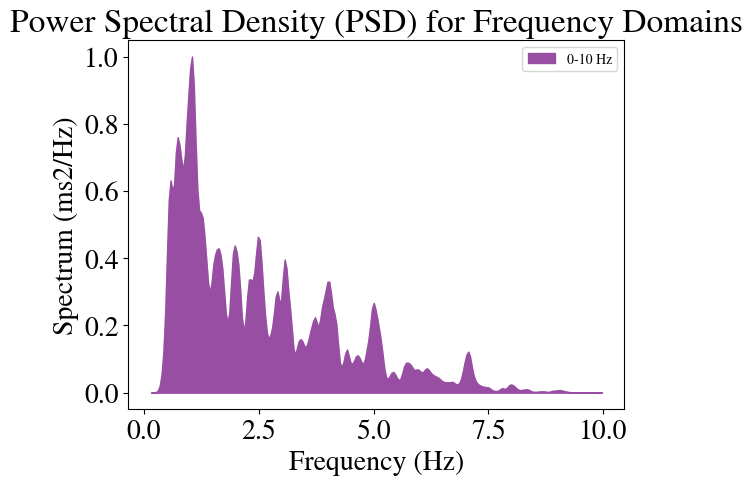

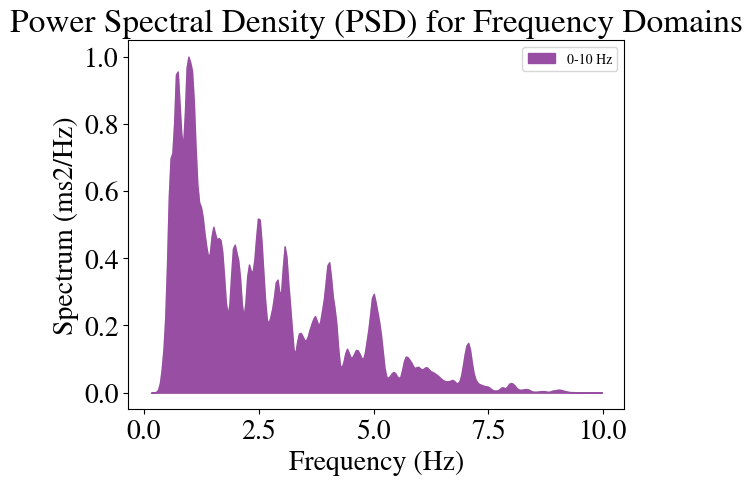

In [19]:
signal = nk.signal_simulate(frequency=5) + 0.5*nk.signal_simulate(frequency=20)
power_plot1 = nk.signal_power(nk.ppg_clean(data['Unnamed: 1']), frequency_band=[(0, 10)], method="welch", show=True)
power_plot2 = nk.signal_power(nk.ppg_clean(data['Unnamed: 2']), frequency_band=[(0, 10)], method="welch", show=True)
power_plot3 = nk.signal_power(nk.ppg_clean(data['Unnamed: 3']), frequency_band=[(0, 10)], method="welch", show=True)
power_plot1
power_plot2
power_plot3

## unfiltered compression PPG data

In [20]:
data =  data.dropna(inplace=False)
data.head(), data.min()

(   1649438306  Unnamed: 1  Unnamed: 2  Unnamed: 3
 0          98     74722.0    252665.0    264880.0
 1          98     74761.0    252726.0    264924.0
 2          98     74801.0    252745.0    264944.0
 3          98     74787.0    252654.0    264851.0
 4          98     74706.0    252366.0    264568.0,
 1649438306         0.0
 Unnamed: 1     70033.0
 Unnamed: 2    238400.0
 Unnamed: 3    252289.0
 dtype: float64)

histograms of the each channels

Text(0.5, 0, 'Data range bins')

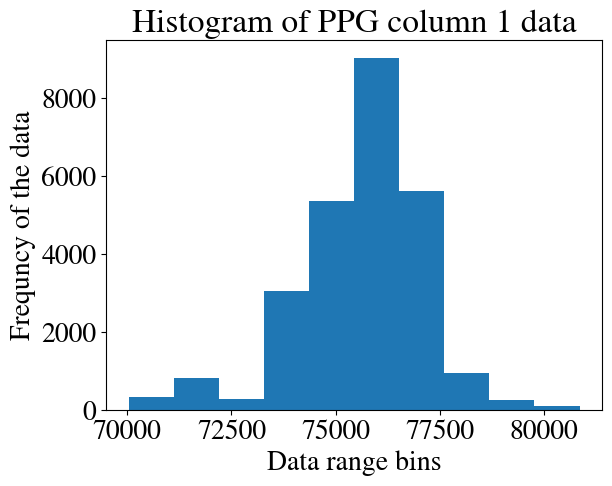

In [21]:
column_1 = data['Unnamed: 1']
plt.hist(column_1)
plt.title('Histogram of PPG column 1 data')
plt.ylabel('Frequncy of the data')
plt.xlabel('Data range bins')


Text(0.5, 0, 'Data range bins')

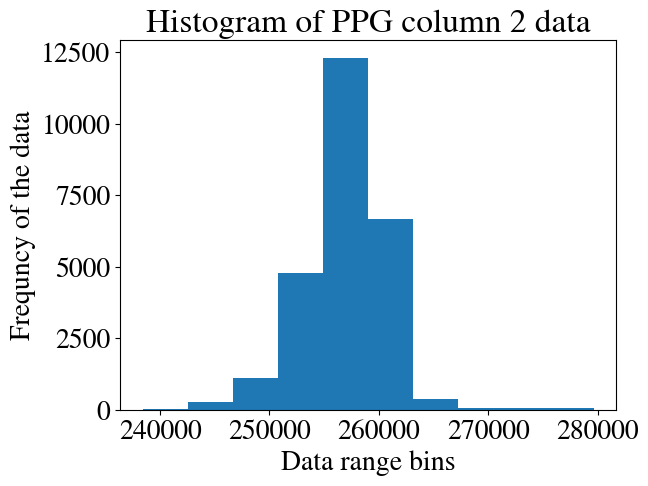

In [22]:
column_1 = data['Unnamed: 2']
plt.hist(column_1)
plt.title('Histogram of PPG column 2 data')
plt.ylabel('Frequncy of the data')
plt.xlabel('Data range bins')


Text(0.5, 0, 'Data range bins')

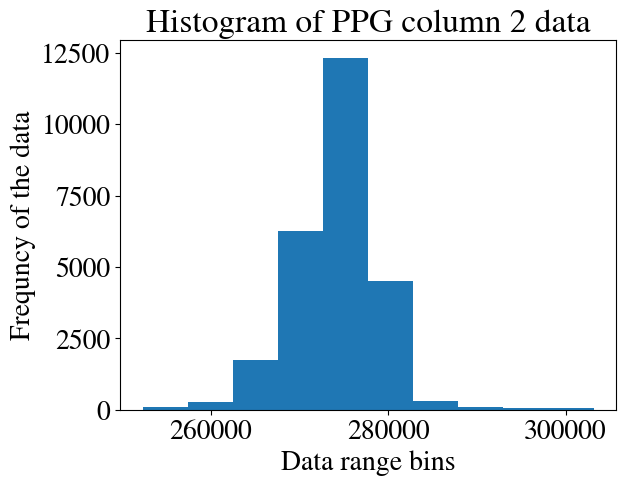

In [23]:
column_1 = data['Unnamed: 3']
plt.hist(column_1)
plt.title('Histogram of PPG column 2 data')
plt.ylabel('Frequncy of the data')
plt.xlabel('Data range bins')


In [24]:
def compression_ratio(ppg_raw: np.ndarray, raw_file_size: float) -> None:
    
    non_neg_val = ppg_raw
    
    np_non_neg_val = np.array(non_neg_val)
    k_min = math.floor(math.log2((2/3) * (np_non_neg_val.mean() + 1)))
    k_max = math.ceil(math.log2(np_non_neg_val.mean()))
    numerator = math.log10((math.sqrt(5) + 1) / 2 - 1)
    denominator = np.log10(np_non_neg_val.mean() / (np_non_neg_val.mean() + 1))
    k_geo = 1 + math.floor(math.log2(numerator / denominator))
    
    k_dict = {'k_min': k_min, 'k_max': k_max, 'k_geo': k_geo}
    
    non_neg_int_val = [int(val) for val in non_neg_val]
    print(k_dict)
    pass

    for x, y in k_dict.items():
        temp_code_words = [encode(val, y) for val in non_neg_int_val]  # Assuming encode is defined
        
        file_name = f'ppg_code_non_filter_words_channel_3_{x}.txt'
        with open(file_name, 'w') as file:
            for val in temp_code_words:
                file.write(val + "\n")
        temp_code_words = []
                
    for x in k_dict.keys():
        file_name = f'ppg_code_non_filter_words_channel_3_{x}.txt'
        file_size = os.path.getsize(file_name)
        print(f'the file size of the {x} is {file_size}')
        print(f'the compression ratio for {x} is {file_size / raw_file_size}')


channel 1 compression 

In [25]:
with open('PPG_raw_non_filter_channel_1.txt', 'w') as file:
    for val in data['Unnamed: 1']:
        file.write(str(val) + "\n")

In [26]:
raw_non_filter_channel_1_size = os.path.getsize('PPG_raw_non_filter_channel_1.txt')
raw_non_filter_channel_1_size 

206200

In [27]:
compression_ratio(data['Unnamed: 1'], raw_non_filter_channel_1_size)

{'k_min': 15, 'k_max': 17, 'k_geo': 16}
the file size of the k_min is 489725
the compression ratio for k_min is 2.375
the file size of the k_max is 489725
the compression ratio for k_max is 2.375
the file size of the k_geo is 489725
the compression ratio for k_geo is 2.375


In [28]:
with open('PPG_raw_non_filter_channel_2.txt', 'w') as file:
    for val in data['Unnamed: 2']:
        file.write(str(val) + "\n")

In [29]:
raw_non_filter_channel_2_size = os.path.getsize('PPG_raw_non_filter_channel_2.txt')
raw_non_filter_channel_2_size 

231975

In [30]:
compression_ratio(data['Unnamed: 2'], raw_non_filter_channel_2_size)

{'k_min': 17, 'k_max': 18, 'k_geo': 17}
the file size of the k_min is 516827
the compression ratio for k_min is 2.227942666235586
the file size of the k_max is 516827
the compression ratio for k_max is 2.227942666235586
the file size of the k_geo is 516827
the compression ratio for k_geo is 2.227942666235586


In [31]:
with open('PPG_raw_non_filter_channel_3.txt', 'w') as file:
    for val in data['Unnamed: 3']:
        file.write(str(val) + "\n")

In [32]:
raw_non_filter_channel_3_size = os.path.getsize('PPG_raw_non_filter_channel_3.txt')
raw_non_filter_channel_3_size 

231975

In [33]:
compression_ratio(data['Unnamed: 3'], raw_non_filter_channel_3_size)

{'k_min': 17, 'k_max': 19, 'k_geo': 18}
the file size of the k_min is 540906
the compression ratio for k_min is 2.331742644681539
the file size of the k_max is 541275
the compression ratio for k_max is 2.3333333333333335
the file size of the k_geo is 540906
the compression ratio for k_geo is 2.331742644681539


unfiletered data are not good to be compressed

ppg filtering

In [34]:
##filter parameters
lowcut = 0.5
highcut = 12
orders = 2

Butterworth_data_1 = butter_bandpass_filter_zi(data['Unnamed: 1'][:1000], lowcut, highcut, 25, order=orders)
Butterworth_data_2 = butter_bandpass_filter_zi(data['Unnamed: 2'][:1000], lowcut, highcut, 25, order=orders)
Butterworth_data_3 = butter_bandpass_filter_zi(data['Unnamed: 3'][:1000], lowcut, highcut, 25, order=orders)


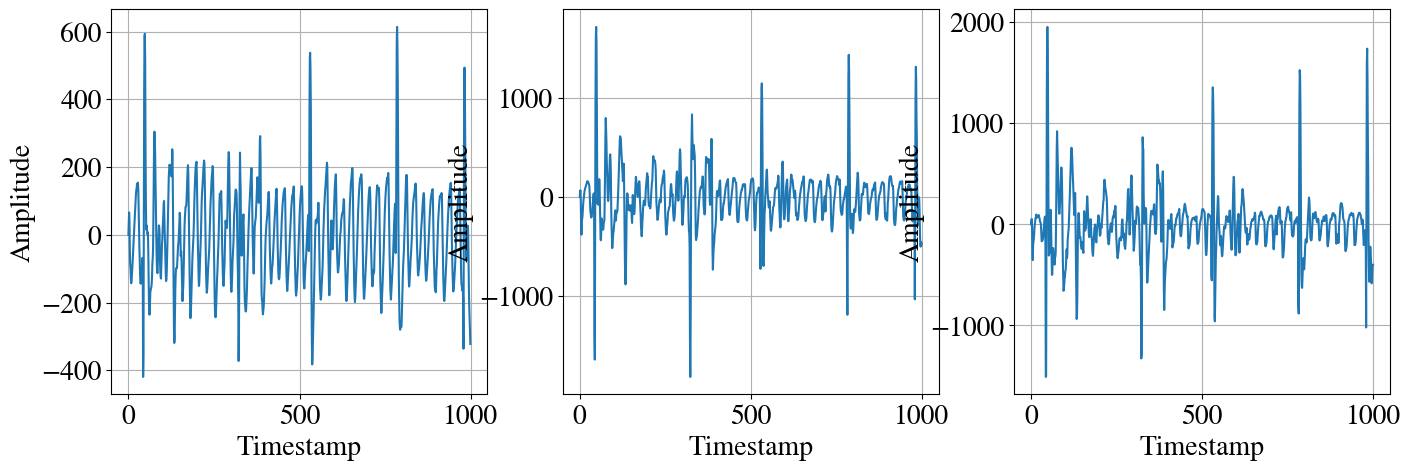

In [35]:
plt.figure(figsize=(16.5,5))
plt.subplot(1,3,1)
plt.plot(Butterworth_data_1)
plt.ylabel("Amplitude")
plt.xlabel('Timestamp')
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(Butterworth_data_2)
plt.ylabel("Amplitude")
plt.xlabel('Timestamp')
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(Butterworth_data_3)
plt.ylabel("Amplitude")
plt.xlabel('Timestamp')
plt.grid()
plt.savefig('ppg_filtered.pdf', bbox_inches = 'tight')

filtered data compression

In [36]:
##channel1
def compression_ratio(ppg_raw: np.ndarray, raw_file_size: float) -> None:
    min_val = abs(ppg_raw.min())
    non_neg_val = ppg_raw + min_val + 1
    
    np_non_neg_val = np.array(non_neg_val)
    k_min = math.floor(math.log2((2/3) * (np_non_neg_val.mean() + 1)))
    k_max = math.ceil(math.log2(np_non_neg_val.mean()))
    numerator = math.log10((math.sqrt(5) + 1) / 2 - 1)
    denominator = np.log10(np_non_neg_val.mean() / (np_non_neg_val.mean() + 1))
    k_geo = 1 + math.floor(math.log2(numerator / denominator))
    
    k_dict = {'k_min': k_min, 'k_max': k_max, 'k_geo': k_geo}
    
    non_neg_int_val = [int(val) for val in non_neg_val]
    print(k_dict)

    for x, y in k_dict.items():
        temp_code_words = [encode(val, y) for val in non_neg_int_val]  # Assuming encode is defined
        
        file_name = f'code_filter_words_channel_3_{x}.txt'
        with open(file_name, 'w') as file:
            for val in temp_code_words:
                file.write(val + "\n")
        temp_code_words = []
                
    for x in k_dict.keys():
        file_name = f'code_filter_words_channel_3_{x}.txt'
        file_size = os.path.getsize(file_name)
        print(f'the file size of the {x} is {file_size}')
        print(f'the compression ratio for {x} is {file_size / raw_file_size}')


In [37]:
with open('ppg_raw_filter_channel_1.txt', 'w') as file:
    for val in Butterworth_data_1:
        file.write(str(val) + "\n")

In [38]:
raw_filter_channel_1_size = os.path.getsize('ppg_raw_filter_channel_1.txt')
raw_filter_channel_1_size 

18917

In [39]:
compression_ratio(Butterworth_data_1, raw_filter_channel_1_size)

{'k_min': 8, 'k_max': 9, 'k_geo': 8}
the file size of the k_min is 11196
the compression ratio for k_min is 0.5918486017867527
the file size of the k_max is 11282
the compression ratio for k_max is 0.596394777184543
the file size of the k_geo is 11196
the compression ratio for k_geo is 0.5918486017867527


channel 2 

In [40]:
with open('ppg_raw_filter_channel_2.txt', 'w') as file:
    for val in Butterworth_data_2:
        file.write(str(val) + "\n")

In [41]:
raw_filter_channel_2_size = os.path.getsize('ppg_raw_filter_channel_2.txt')
raw_filter_channel_2_size 

18971

In [42]:
compression_ratio(Butterworth_data_2, raw_filter_channel_2_size)

{'k_min': 10, 'k_max': 11, 'k_geo': 10}
the file size of the k_min is 13093
the compression ratio for k_min is 0.6901586632228137
the file size of the k_max is 13096
the compression ratio for k_max is 0.690316799325286
the file size of the k_geo is 13093
the compression ratio for k_geo is 0.6901586632228137


channel 3

In [43]:
with open('ppg_raw_filter_channel_3.txt', 'w') as file:
    for val in Butterworth_data_3:
        file.write(str(val) + "\n")

In [44]:
raw_filter_channel_3_size = os.path.getsize('ppg_raw_filter_channel_3.txt')
raw_filter_channel_3_size 

18880

In [45]:
compression_ratio(Butterworth_data_3, raw_filter_channel_3_size)

{'k_min': 9, 'k_max': 11, 'k_geo': 10}
the file size of the k_min is 13491
the compression ratio for k_min is 0.7145656779661017
the file size of the k_max is 13035
the compression ratio for k_max is 0.6904131355932204
the file size of the k_geo is 12996
the compression ratio for k_geo is 0.6883474576271187


In [46]:
import numpy as np
import math
import os

def compression_ratio(eeg_raw: np.ndarray, raw_file_size: float) -> None:
    min_val = abs(eeg_raw.min())
    non_neg_val = eeg_raw + min_val + 1
    
    np_non_neg_val = np.array(non_neg_val)
    k_min = math.floor(math.log2((2/3) * (np_non_neg_val.mean() + 1)))
    k_max = math.ceil(math.log2(np_non_neg_val.mean()))
    numerator = math.log10((math.sqrt(5) + 1) / 2 - 1)
    denominator = np.log10(np_non_neg_val.mean() / (np_non_neg_val.mean() + 1))
    k_geo = 1 + math.floor(math.log2(numerator / denominator))
    
    k_dict = {'k_min': k_min, 'k_max': k_max, 'k_geo': k_geo}
    
    non_neg_int_val = [int(val) for val in non_neg_val]
    print(k_dict)
    
    k_val = [7, 11]
    
    for y in k_val:
        temp_code_words = [encode(val, y) for val in non_neg_int_val]
        file_name = f'out_of_range_filter_words_channel_other_{y}.txt'
        with open(file_name, 'w') as file:
            for val in temp_code_words:
                file.write(val + "\n")
        temp_code_words = []
        
    for y in k_val:
        file_name = f'out_of_range_filter_words_channel_other_{y}.txt'
        file_size = os.path.getsize(file_name)
        print(f'the file size of the {y} is {file_size}')
        print(f'the compression ratio for {y} is {file_size / raw_file_size}')

In [47]:
compression_ratio( Butterworth_data_1 , raw_filter_channel_1_size)

{'k_min': 8, 'k_max': 9, 'k_geo': 8}
the file size of the 7 is 11798
the compression ratio for 7 is 0.6236718295712851
the file size of the 11 is 13000
the compression ratio for 11 is 0.687212560131099


plots  -> for filtered

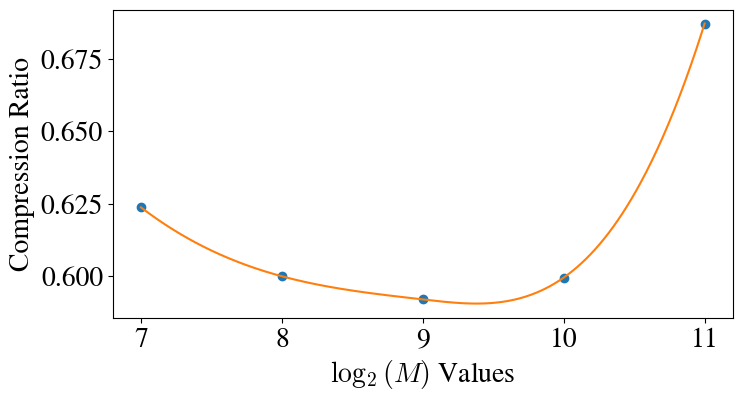

In [48]:
k_vals = np.array([7,8, 9, 10, 11])
code_rate = np.array([ 0.6236718295712851, 0.5998486017867527, 0.5918486017867527,  0.599394777184543, 0.687212560131099])
code_rate_spline = make_interp_spline(k_vals, code_rate)
k_vals_2= np.linspace(k_vals.min(), k_vals.max(),500)

code_rate_spline_values = code_rate_spline(k_vals_2)

plt.figure(figsize=(8, 4))
plt.plot(k_vals, code_rate, 'o')
plt.plot(k_vals_2, code_rate_spline_values)
plt.xlabel(r'$\log_2(M) $ Values')
plt.ylabel('Compression Ratio')
plt.savefig('ppg_convex_curve.pdf', bbox_inches='tight')

plotsv  -> for non-filtered

In [49]:
## non fileterd data are not suitable for compression as the compression ratio is above 1.0 please refer the experiment conducted 
## above on the non-filtered data

time calculation for ppg compression 

In [50]:
def compression_ratio(eeg_raw: np.ndarray,  y) -> None:
    min_val = abs(eeg_raw.min())
    non_neg_val = eeg_raw + min_val + 1
    
    np_non_neg_val = np.array(non_neg_val)
    k_min = math.floor(math.log2((2/3) * (np_non_neg_val.mean() + 1)))
    k_max = math.ceil(math.log2(np_non_neg_val.mean()))
    numerator = math.log10((math.sqrt(5) + 1) / 2 - 1)
    denominator = np.log10(np_non_neg_val.mean() / (np_non_neg_val.mean() + 1))
    k_geo = 1 + math.floor(math.log2(numerator / denominator))
    
    k_dict = {'k_min': k_min, 'k_max': k_max, 'k_geo': k_geo}
    
    non_neg_int_val = [int(val) for val in non_neg_val]
    
    temp_code_words = [encode(val, y) for val in non_neg_int_val]

In [51]:
%timeit compression_ratio(Butterworth_data_3, 11)
%timeit compression_ratio(Butterworth_data_3, 11)
%timeit compression_ratio(Butterworth_data_3, 11)
%timeit compression_ratio(Butterworth_data_3, 11)

217 µs ± 2.47 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
216 µs ± 1.05 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%timeit compression_ratio(data['Unnamed: 1'], 19)
%timeit compression_ratio(data['Unnamed: 1'], 19)
%timeit compression_ratio(data['Unnamed: 1'], 19)
%timeit compression_ratio(data['Unnamed: 1'], 19)

In [ ]:
%timeit compression_ratio(data['Unnamed: 2'], 19)
%timeit compression_ratio(data['Unnamed: 2'], 19)
%timeit compression_ratio(data['Unnamed: 2'], 19)
%timeit compression_ratio(data['Unnamed: 2'], 19)

In [ ]:
%timeit compression_ratio(data['Unnamed: 3'], 19)
%timeit compression_ratio(data['Unnamed: 3'], 19)
%timeit compression_ratio(data['Unnamed: 3'], 19)
%timeit compression_ratio(data['Unnamed: 3'], 19)

6.56 ms ± 84.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.6 ms ± 138 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.18 ms ± 63.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
